# Notebook 3:  Redes de Kohonen y SOM (Self organized maps)
En este notebook vamos a implementar el algoritmo de clustering SOM en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



In [6]:
library(kohonen)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
summary(datos)

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

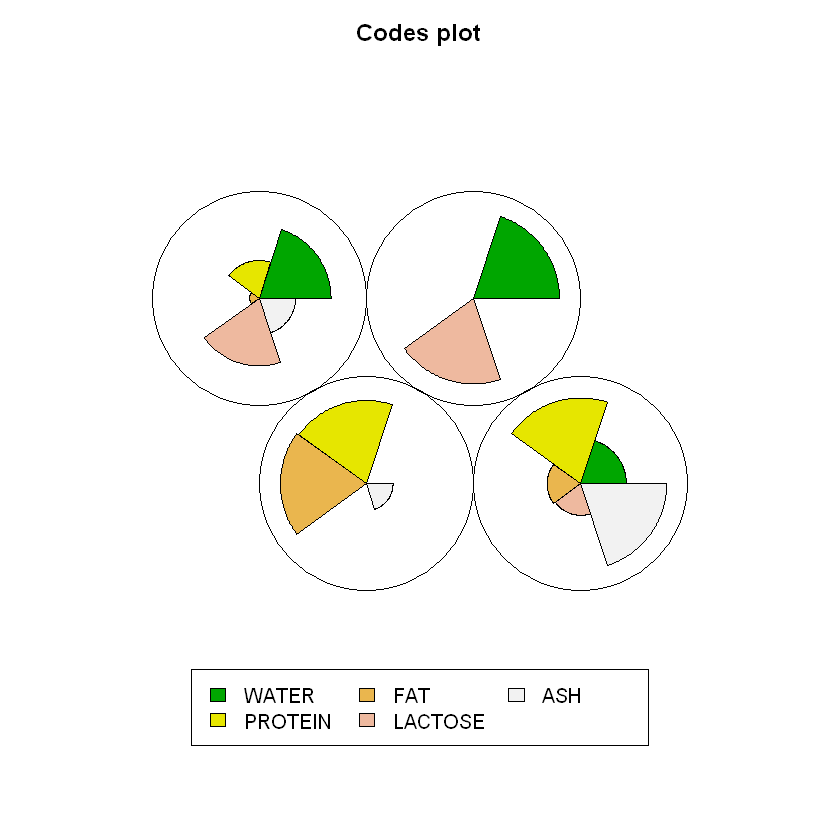

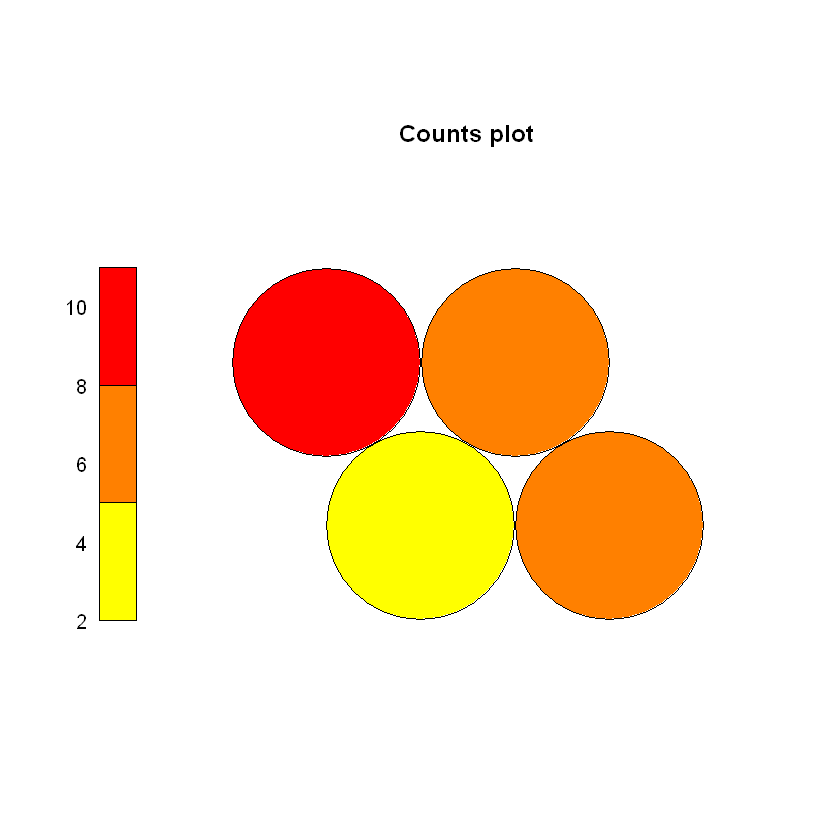

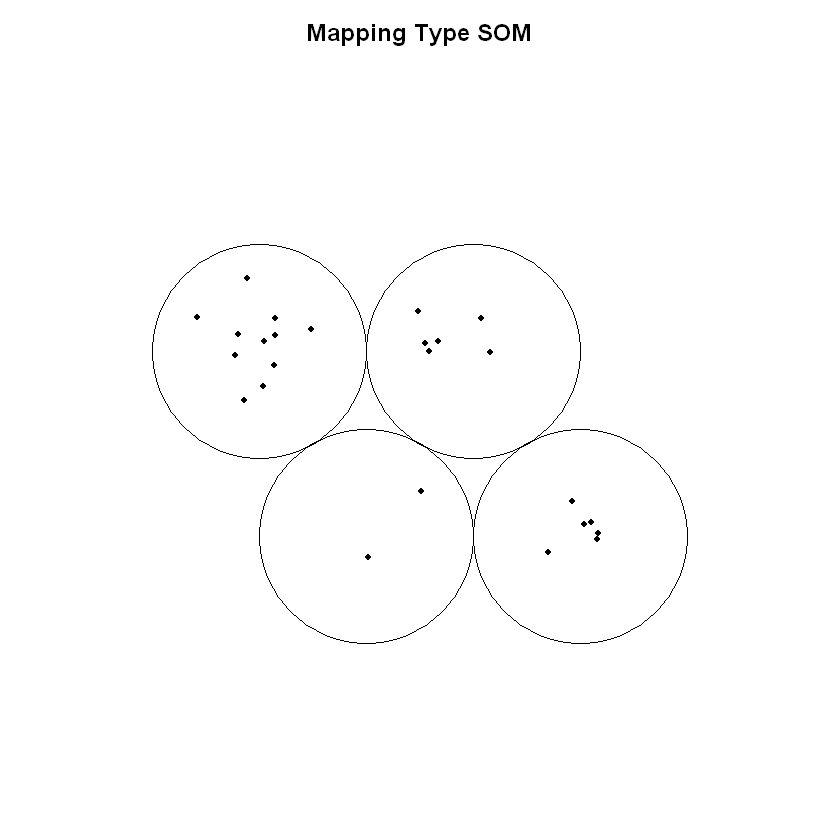

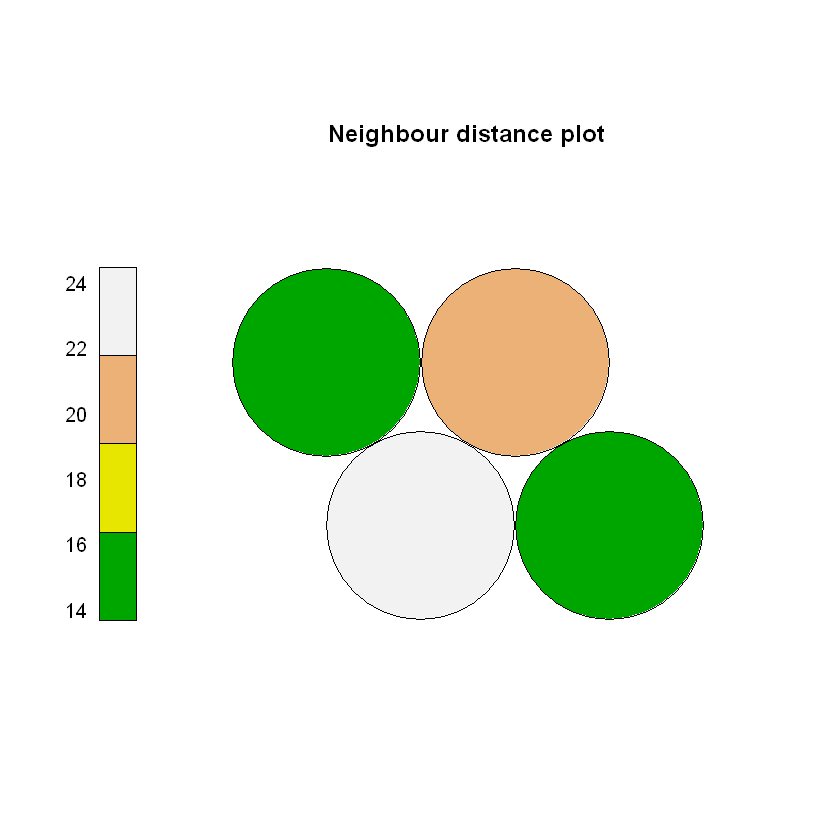

In [7]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(2, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)


Ejercicio 1: 
a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.
b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

# Respuesta

**a)** La función som es un tipo de Red Neuronal que se utiliza para aprendizaje no supervisado y corresponde a Mapas autoorganizados para mapear espectros o patrones de alta dimensión a 2D principalmente.Se usa la distancia euclidiana, y los parámetros más importante que usa son:

**Entrada**

**data:** una matriz, con cada fila representando un objeto.
**grid:** una grilla para los representantes: ver 'somgrid'.
**rlen:** la cantidad de veces que se presentará a la red el conjunto de datos completo.
**alpha:** tasa de aprendizaje, un vector de dos números que indica la cantidad de cambio. El valor predeterminado es disminuir linealmente de 0.05 a 0.01 sobre las actualizaciones rlen.
**radius:** El radio del vecindario, dado como un solo número o como un vector (inicio, parada). Si se da como un número único, el radio se extenderá desde el número dado hasta el valor negativo de ese número; Tan pronto como el vecindario sea más pequeño que uno, solo se actualizará la unidad ganadora. El valor predeterminado es comenzar con un valor que cubra 2/3 de todas las distancias de unidad a unidad.
**initial:** los representantes iniciales, representados como una matriz.
**toroidal:** si es VERDADERO, los bordes del mapa están unidos. Tenga en cuenta que en un mapa toroidal hexagonal, el número de filas debe ser par.
**n.hood:** la forma del barrio, ya sea "circular" o "cuadrado". Este último es el predeterminado para mapas rectangulares, el primero para mapas hexagonales.
**keep.data:**     guardar datos.

**Salida**

**data:** matriz de datos, solo devuelta si keep.data == TRUE.
**grid:** la cuadrícula, un objeto de la clase "somgrid".
**distances:** distancias de objetos a su unidad ganadora correspondiente, solo se devuelve si keep.data == TRUE.
**method:** el tipo de som.

Respecto a los gráficos, en el primero podemos visualizar los 4 nodos que corresponden a los grupos y las porciones coloreadas corresponden a las distintas variables de la data. Si vamos de arriba hacia abajo y de izquierda a derecha, podemos ver que el primer grupo tiene mas proporcion de agua y lactosa y una proporción mas pequeña de las demás variables en su leche. El segundo grupo posee una alta proporción de agua y lactosa y prácticamente nada de las demás. El tercer grupo tiene un alto porcentaje de grasa y proteinas y un ppoco de calcio. Y el último grupo posee una elevada proporción de ash y proteina y una baja cantidad en los demás componentes en sus leches. El segundo gráfico nos entrega la cantidad de individuos en cada grupo, el primero está en un rango de 8 a 10, el segundo y cuarto poseen una cantidad entre 6 y 8 y el tercero posee en menor medida entre 2 y 4. En el tercer gráfico podemos ver más en detalle la cantidad de individuos en cada grupo y su mapeo en cada grupo que viene dado por los pesos en los nodos de activación. Finalmente el último gráfico nos brinda las distancia que existen entre los individuos en cada grupo

**b)**

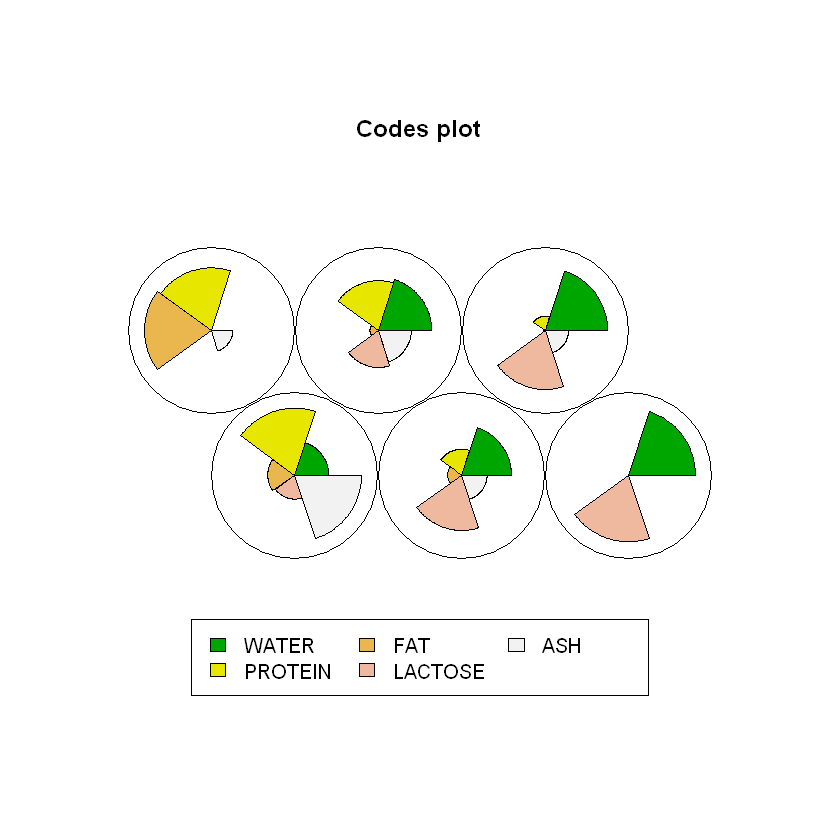

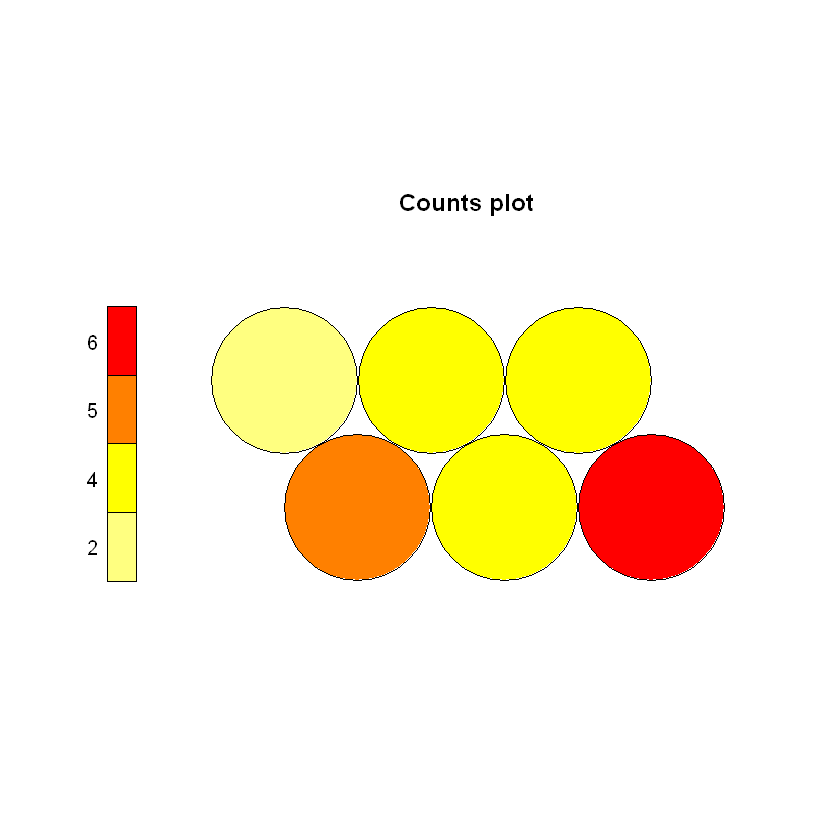

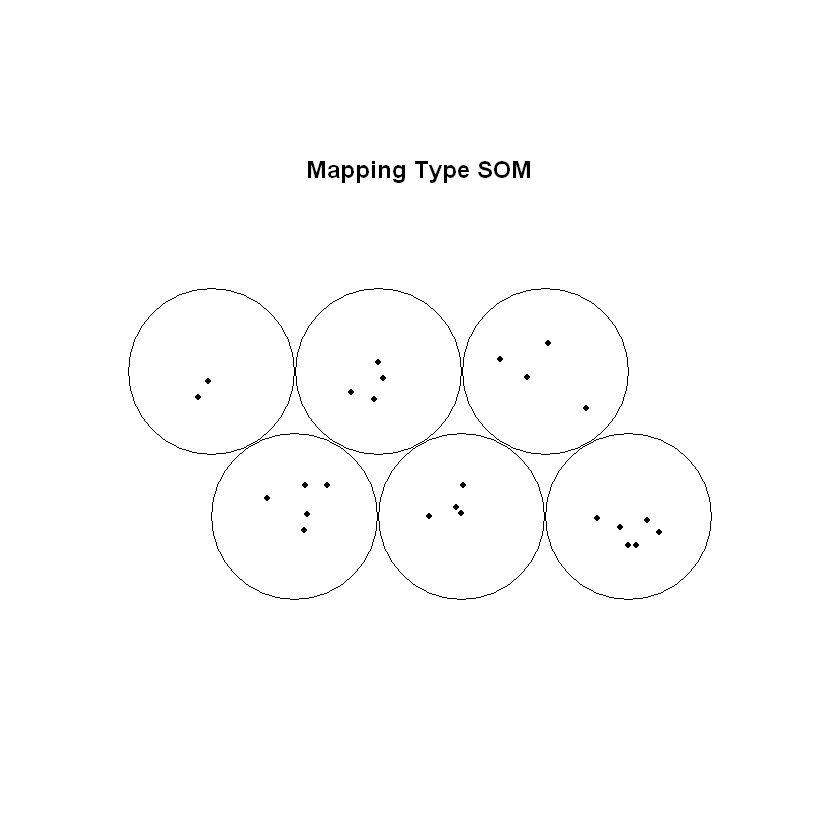

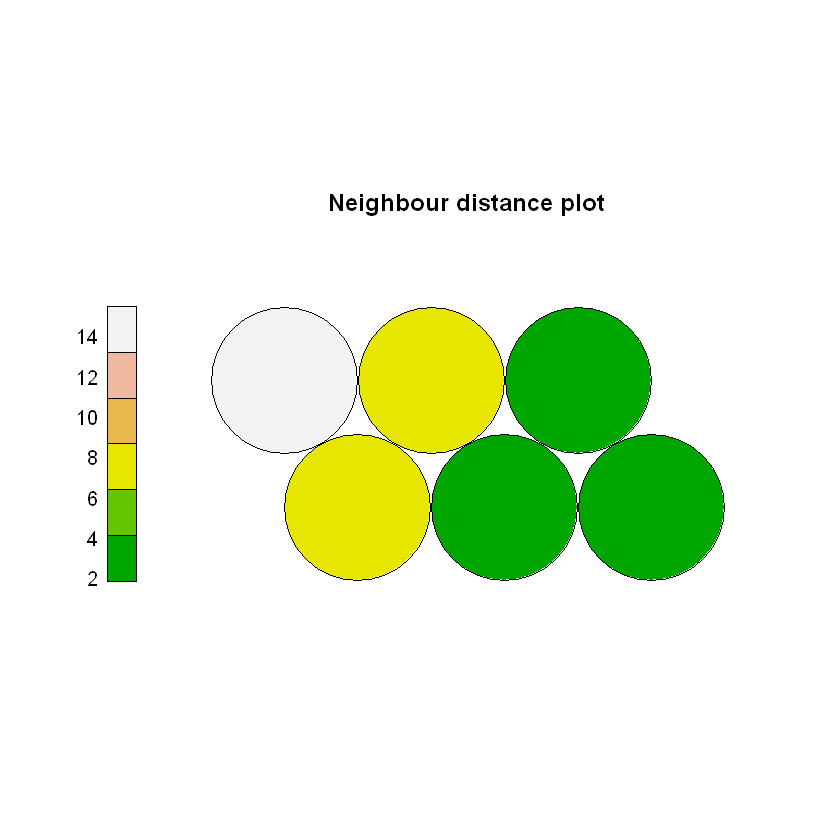

In [8]:
#create SOM grid
sommap <- som(scale(datos), grid = somgrid(3, 2, "hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

Al aumentar el número de la grilla, aumentamos el número de grupos. En este caso nos quedaron 6 grupos que a mi parecer vendria a ser un mejor agrupamiento entre los mamíferos ya que vemos en el último gráfico que las distancias entre los individuos en cada grupo es menor si lo comparamos con los resultados vistos en **a)** y del primer gráfico podemos observar que los grupos mantienen diferencias entre si, por lo que mejora un poco la distribución de los individuos.

Warning message in matrix(sommap$codes[[1]], ncol = 4, nrow = 4, byrow = FALSE):
"la longitud de los datos [30] no es un submúltiplo o múltiplo del número de filas [4] en la matriz"


ERROR: Error in if (abs(dloc[2]) < 0.1) {: valor ausente donde TRUE/FALSE es necesario


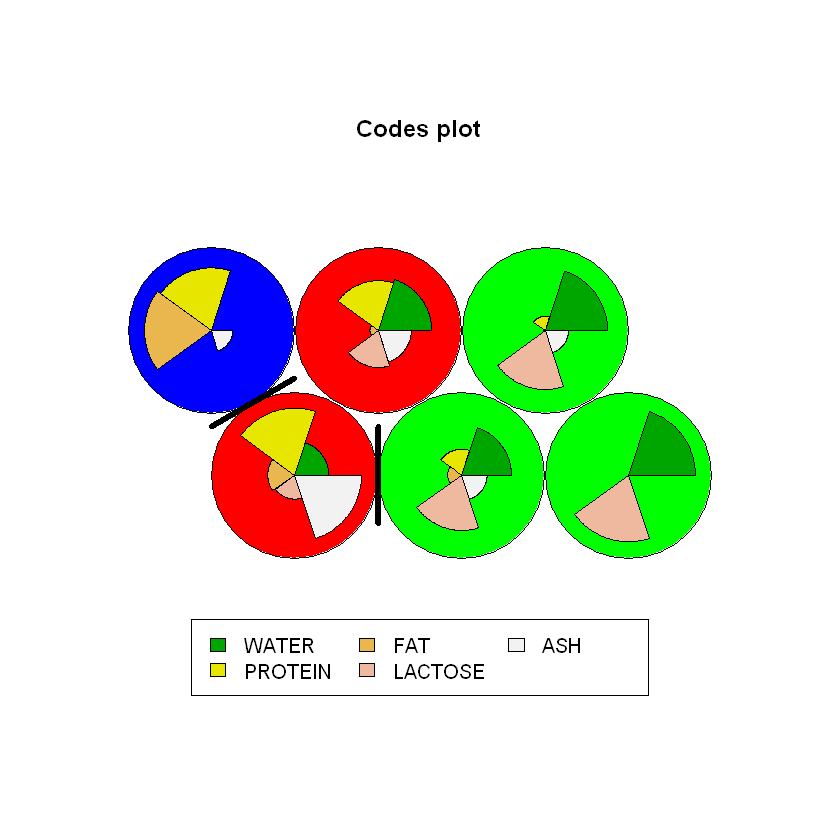

In [9]:
mat <- matrix(sommap$codes[[1]], ncol=4,nrow=4,byrow=FALSE)

## use hierarchical clustering to cluster the codebook vectors
groups<-3
som.hc <- cutree(hclust(dist(mat)), groups)

#plot
plot(sommap, type="codes", bgcol=rainbow(groups)[som.hc])

#cluster boundaries
add.cluster.boundaries(sommap, som.hc)


Ejercicio 2: 

a) Explique como funciona esta nueva visualización.

b) Interprete y comente los resultados obtenidos. 

# Respuesta

**a)** En este caso mezclamos éste algoritmo con uno visto en el jupyter anterior que corresponde al análisis jerárquico. Tomamos el agrupamiento del método "som" y aplicamos "hclust" con los valores de activación para ver ciertas relaciones entre los grupos.

**b)** Del gráfico podemos ver los 4 grupos que nos genera el método "som" y las distintas proporciones de las variables en cada grupo. El color en cada grupo representa la relación que existe entre los grupos, que en este caso, solo vemos que existe relación entre los dos grupos de arriba (color azul), lo cual tiene todo el sentido ya que en los 2 grupos podemos ver una alta proporción de agua y lactosa en la leche de los mamíferos, mientras que los otros grupos no poseen tanta similitud en dichas proporciones.

Ejercicio 3: 

a) Proponga un nuevo conjunto de datos a los cuales aplicar este algoritmo. Justifique su elección

b) Realice las estimaciones y discuta sus resultados.

# Respuesta

**a)** Elegí un conjuntos de datos que representa la cantidad de suicidios entre 10 países el año que pasó 2019, nos indica el promedio de hombres y mujeres para cada país y una tasa per capita de estos. Elegí ésta opción ya que podemos agrupar a los países con mayores riesgos de suicidos entre sus ciudadanos separandolos entre hombre o mujer, haciendo una visualización en un mapa de color con los países mas afectador para después poder tratarlos en futuras ocasiones.

In [10]:
library(kohonen)
library(dplyr)
set.seed(7)

#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas

datos_suicide <-read.csv("suicide-death-rates.csv",row.names=1,header=TRUE,dec=".",sep=",")



#datos_suicide <- select(datos_suicide, -Entity,-Code) # Forma simple 1
datos_suicide <- as.data.frame(datos_suicide)
datos_suicide
summary(datos_suicide)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




,Suicide.rate.per.capita.,Male,Female
,<dbl>,<dbl>,<dbl>
Sri lanka,34.6,58.8,13.3
Guyana,30.6,46.0,15.5
Mongolia,28.1,48.2,9.2
Kazakhstan,27.5,48.1,9.6
Cªte d'lvoire,27.2,38.8,14.4
Suriname,26.9,41.6,12.6
Equatorial Guinea,26.6,39.1,13.2
Lithuania,26.1,47.1,8.1
Angola,25.9,38.1,14.3


 Suicide.rate.per.capita.      Male           Female     
 Min.   :24.10            Min.   :36.10   Min.   : 8.10  
 1st Qu.:26.23            1st Qu.:38.88   1st Qu.:10.35  
 Median :27.05            Median :43.80   Median :13.25  
 Mean   :27.76            Mean   :44.19   Mean   :12.36  
 3rd Qu.:27.95            3rd Qu.:47.85   3rd Qu.:14.07  
 Max.   :34.60            Max.   :58.80   Max.   :15.50  

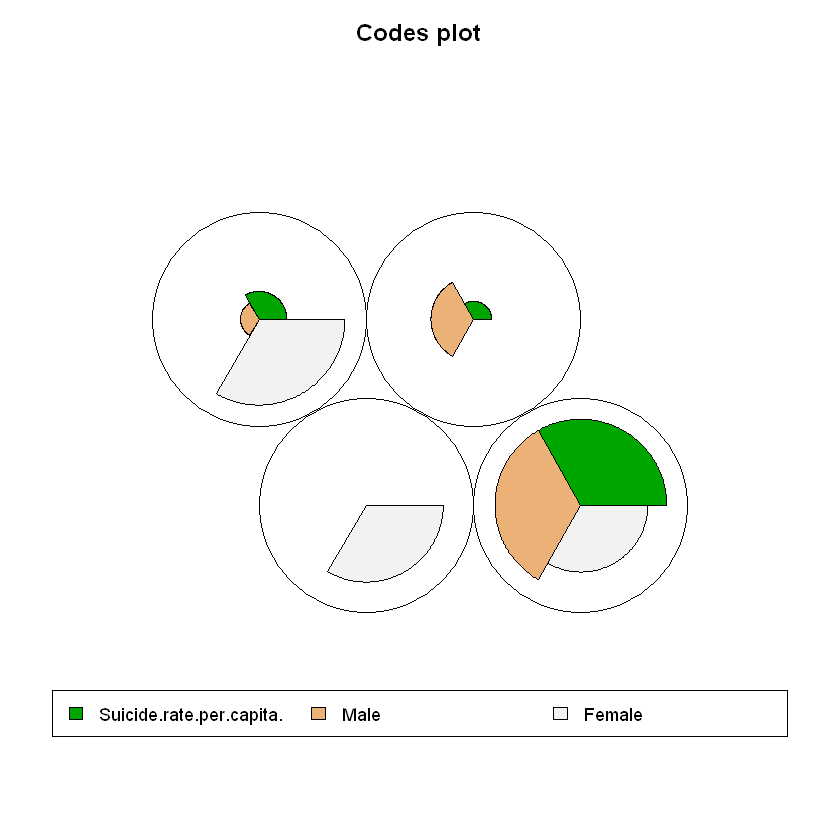

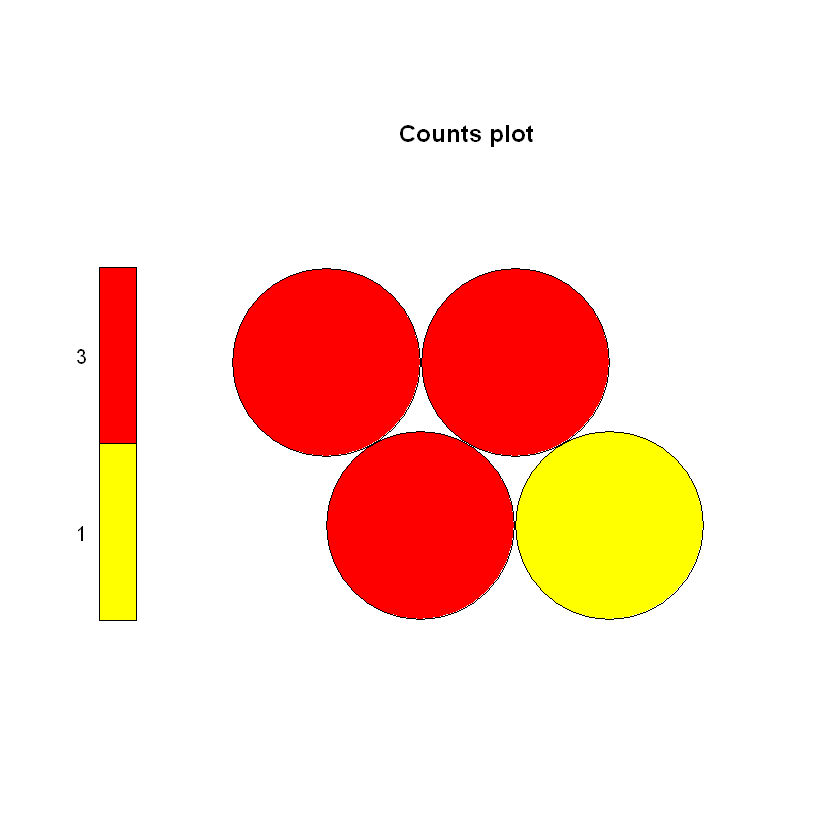

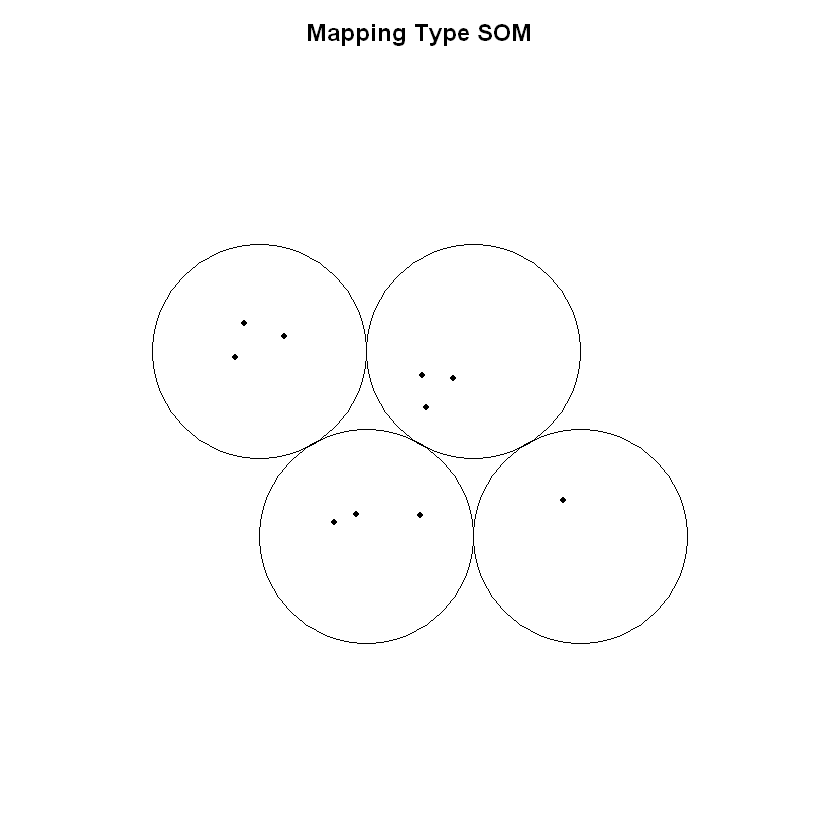

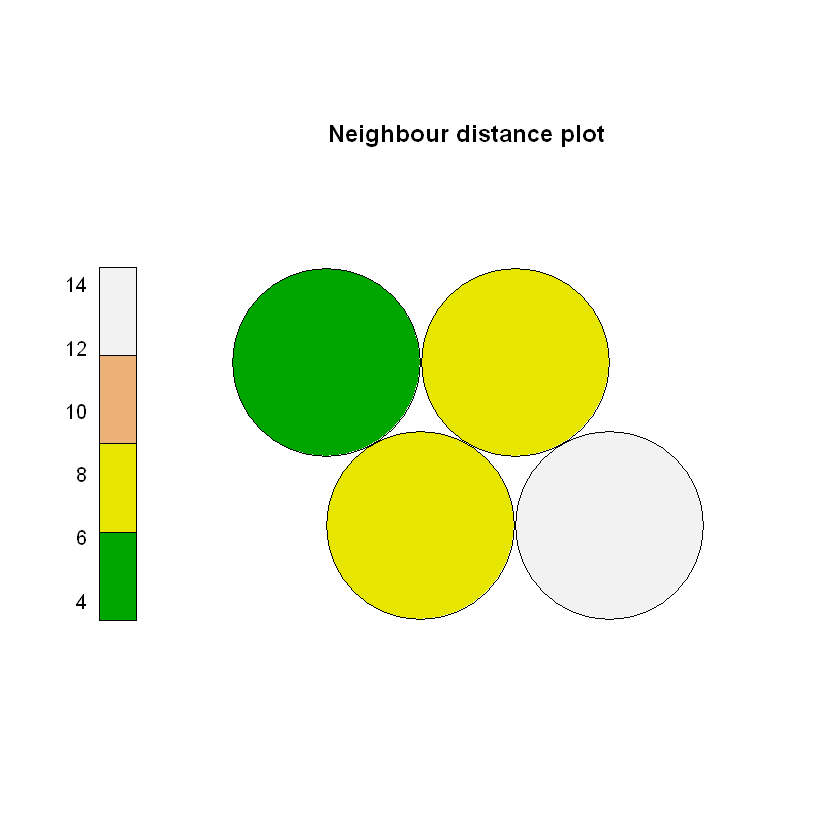

In [11]:
#create SOM grid
sommap <- som(scale(datos_suicide), grid = somgrid(2,2,"hexagonal"))
plot(sommap)

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)

**b)** Viendo los gráficos me doy cuenta que el algoritmo hizo una distinción entre los hombres y mujeres, ya que como vemos en el dataset hay una mayor cantidad de suicidios por parte de hombres en el útimo año, también vemos que un país se escapa de los demás con una tasa mayor y por eso se agrupa solo en un grupo mientras que en los demás existen ciertas similitudes entre las variables. Ahora bien, el dataset seleccionado es bastaste pequeño, pero podria hacerse el mismo estudio con todos los países del mundo para poder tener una mejor visualizacion de las tasas de suicidio en el planeta.

referencia del dataset: https://www.kaggle.com/sathutr/global-suicide-data?select=suicide-death-rates.csv